In [39]:
#first run pip install ucimlrepo
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

In [42]:
# fetch dataset
in_vehicle_coupon_recommendation = fetch_ucirepo(id=603)

# data (as pandas dataframes)
X = in_vehicle_coupon_recommendation.data.features
y = in_vehicle_coupon_recommendation.data.targets


Pre Processing:

In [35]:
#metadata?
#print(in_vehicle_coupon_recommendation.metadata)
pd.set_option('display.max_columns', None)  # Show all columns
#print(X.head())
# variable information
#print(in_vehicle_coupon_recommendation.variables)
#print(len(X))
#print(X.info())
#print(X.describe())
#print(X.isnull().sum())
# -> This shows us only Bar, CoffeHouse, CarryAway, RestaurantsLessThan20 and Restaurant20to50 have missing values. We therefore decide to delete these instances. As the Car column is empty nearly everywhere, we just ignore it
X = X.dropna(subset = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']) #Just drop the missing values considering these columns
print(X.isnull().sum())


destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     11971
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
dtype: int64


Plot the Percentage of missing values in a bar chart

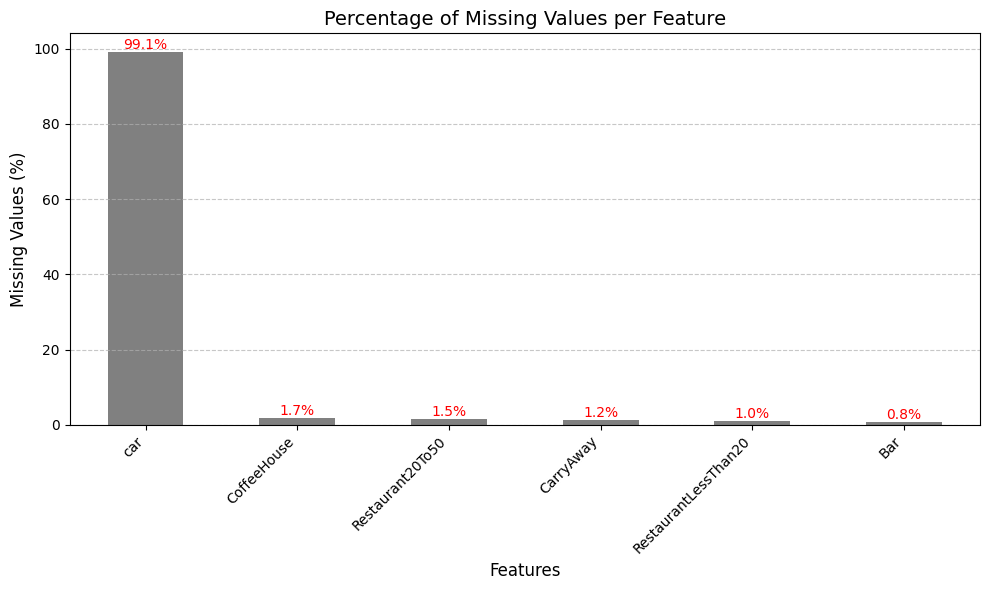

In [27]:
# 1. Calculate percentage of missing values for each column
missing_percent = X.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# 2. Create the bar chart
plt.figure(figsize=(10, 6))
ax = missing_percent.plot(kind='bar', color='blue')

# 3. Add labels and title
plt.title('Percentage of Missing Values per Feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# use of container
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', color='red')

plt.tight_layout()
plt.show()

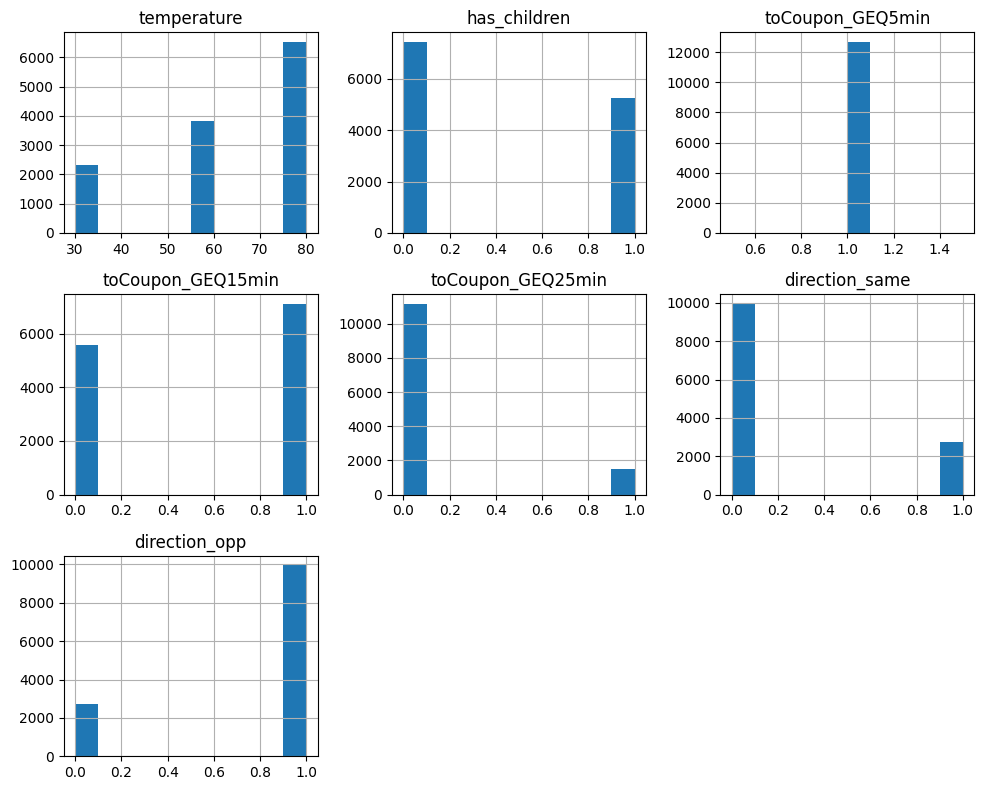

In [5]:
X.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [43]:
print(X.head())


       destination  passenger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner   
1           Coffee House         2h  Female  21  Unmarried partner   
2  Carry out & Take away         2h  Female  21  Unmarried partner   
3           Coffee House         2h  Female  21  Unmarried partner   
4           Coffee House         1d  Female  21  Unmarried partner   

   has_children                 education  occupation           income  car  \
0             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
1             1  Some college - no degree  Unemployed  $3750